# Data Analysis

## Table of Contents
- Load Data
- Univariate Analysis
- Explanatory Analysis

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd

# visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# plotly config
import plotly.io as pio
pio.renderers.default = "browser"

template = "plotly_white"
colors = {
    "red": "rgb(255,0,0)",
    "dark_blue": "rgb(30,144,255)",
    "medium_blue": "rgb(0,191,255)",
    "light_blue": "rgb(135,206,250)",
    "dark_purple": "rgb(202, 105, 157)",
    "medium_purple": "rgb(221, 136, 172)",
    "light_purple": "rgb(234, 169, 189)",
    "dark_gray": "rgb(169,169,169)",
    "medium_gray": "rgb(192,192,192)",
    "light_gray": "rgb(211,211,211)"
}
title_font_size = 22
font_size = 18

# Load Data

In [3]:
df_loans = pd.read_pickle("../data/processed/df_loans.pkl")

df_loans

,id,user_id,amount,total_amount,due_amount,due_date,status,created_at,loan_term,loan_fees,interest_rate
0,0,3070,6000.0,6045.28,6459.00,2022-05-02,repaid,2022-02-01,90,45.28,31.0
1,1,2546,6000.0,6045.28,6459.00,2022-05-02,repaid,2022-02-01,90,45.28,31.0
2,2,2413,6000.0,6045.28,6459.00,2022-05-02,repaid,2022-02-01,90,45.28,31.0
3,3,2585,6000.0,6045.28,6459.00,2022-05-02,debt_collection,2022-02-01,90,45.28,31.0
4,4,2556,6000.0,6045.28,6459.00,2022-05-02,repaid,2022-02-01,90,45.28,31.0
...,...,...,...,...,...,...,...,...,...,...,...
6741,6741,2130,2500.0,2518.87,3228.82,2023-01-01,repaid,2022-10-03,90,18.87,118.0
6742,6742,549,6000.0,6045.28,7749.16,2023-01-01,repaid,2022-10-03,90,45.28,118.0
6743,6743,1414,6000.0,6045.28,7749.16,2023-01-01,repaid,2022-10-03,90,45.28,118.0
6744,6744,2070,6000.0,6045.28,7749.16,2023-01-01,debt_repaid,2022-10-03,90,45.28,118.0


In [4]:
df_loan_repayments = pd.read_pickle("../data/processed/df_loan_repayments.pkl")

df_loan_repayments

,id,loan_id,type,amount,status,created_at,status_cleaned,created_at_month,created_at_month_desc,days_since_loan_created,days_since_due_date,due_date_exceeded,days_lag_repayment,num_late_repayments,prev_status,prev_amount,cumsum_amount,ratio_repaid_total
50,51,0,autopilot,9.75,paid,2022-02-03,paid,2,February,2,0,0,2.0,0,init,0.00,9.75,0.001613
112,113,0,autopilot,45.30,paid,2022-02-04,paid,2,February,3,0,0,1.0,0,paid,9.75,55.05,0.009106
216,217,0,autopilot,25.50,paid,2022-02-05,paid,2,February,4,0,0,1.0,0,paid,45.30,80.55,0.013324
496,497,0,autopilot,10.50,paid,2022-02-08,paid,2,February,7,0,0,3.0,0,paid,25.50,91.05,0.015061
645,646,0,autopilot,226.50,paid,2022-02-09,paid,2,February,8,0,0,1.0,0,paid,10.50,317.55,0.052529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171441,171447,6745,autopilot,6.00,paid,2022-12-14,paid,12,December,72,0,0,1.0,0,paid,36.00,6387.14,1.056550
171538,171544,6745,autopilot,93.00,paid,2022-12-15,paid,12,December,73,0,0,1.0,0,paid,6.00,6480.14,1.071934
171876,171882,6745,autopilot,126.74,paid,2022-12-20,paid,12,December,78,0,0,5.0,0,paid,93.00,6606.88,1.092899
171958,171964,6745,autopilot,203.37,paid,2022-12-21,paid,12,December,79,0,0,1.0,0,paid,126.74,6810.25,1.126540


In [5]:
df_users = pd.read_pickle("../data/processed/df_users.pkl")

df_users

,user_id,recency,frequency,monetary,avg_basket,avg_intallments,avg_lag_transaction,rate_denied,rate_denied_approved,rate_transactions_installment,rate_credit_debit,ratio_online_person,card_preference
0,1,346,10,25154.18,2515.418000,4.500000,6.111111,0.300000,0.375000,0.7,4.500000,0.000000,card_internation
1,2,340,35,66491.00,1899.742857,8.257143,1.852941,0.057143,0.058824,0.971429,17.000000,0.000000,card_brazil
2,3,191,78,117555.00,1507.115385,5.551282,1.740260,0.115385,0.128571,1.0,78.000000,0.012821,card_internation
3,4,15,286,423169.31,1479.612972,2.646853,0.884211,0.090909,0.099617,0.41958,1.657407,0.003497,card_internation
4,5,54,793,440568.44,555.571803,1.952081,0.334596,0.083228,0.090659,0.480454,131.333333,0.000000,card_internation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,3149,216,231,96516.80,417.821645,1.935065,0.682609,0.069264,0.074074,0.333333,2.052632,0.004329,card_internation
3044,3150,8,849,395379.93,465.700742,1.618375,0.459906,0.174323,0.210826,0.398115,2.586498,0.289833,card_internation
3045,3151,140,227,73475.80,323.681938,2.687225,1.137168,0.092511,0.101449,0.568282,2.257143,0.017857,card_internation
3046,3152,39,1118,359051.73,321.155394,3.213775,0.317816,0.135063,0.155992,0.952594,61.166667,0.028493,card_internation


# Univariate Analysis

## Loan Status

**Note:** 23% of the loans have exceeded due date

In [6]:
df_loans["status"] = df_loans["status"].str.replace("_", " ")

In [7]:
fig = px.histogram(
    df_loans[df_loans["status"] != "error"],
    x="status",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>23% of the loans have exceeded due date</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="loan status",
    yaxis_title="% of loans",
    template=template,
)
fig.update_xaxes(
    categoryorder="total descending"
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="inside"
)

fig.show()

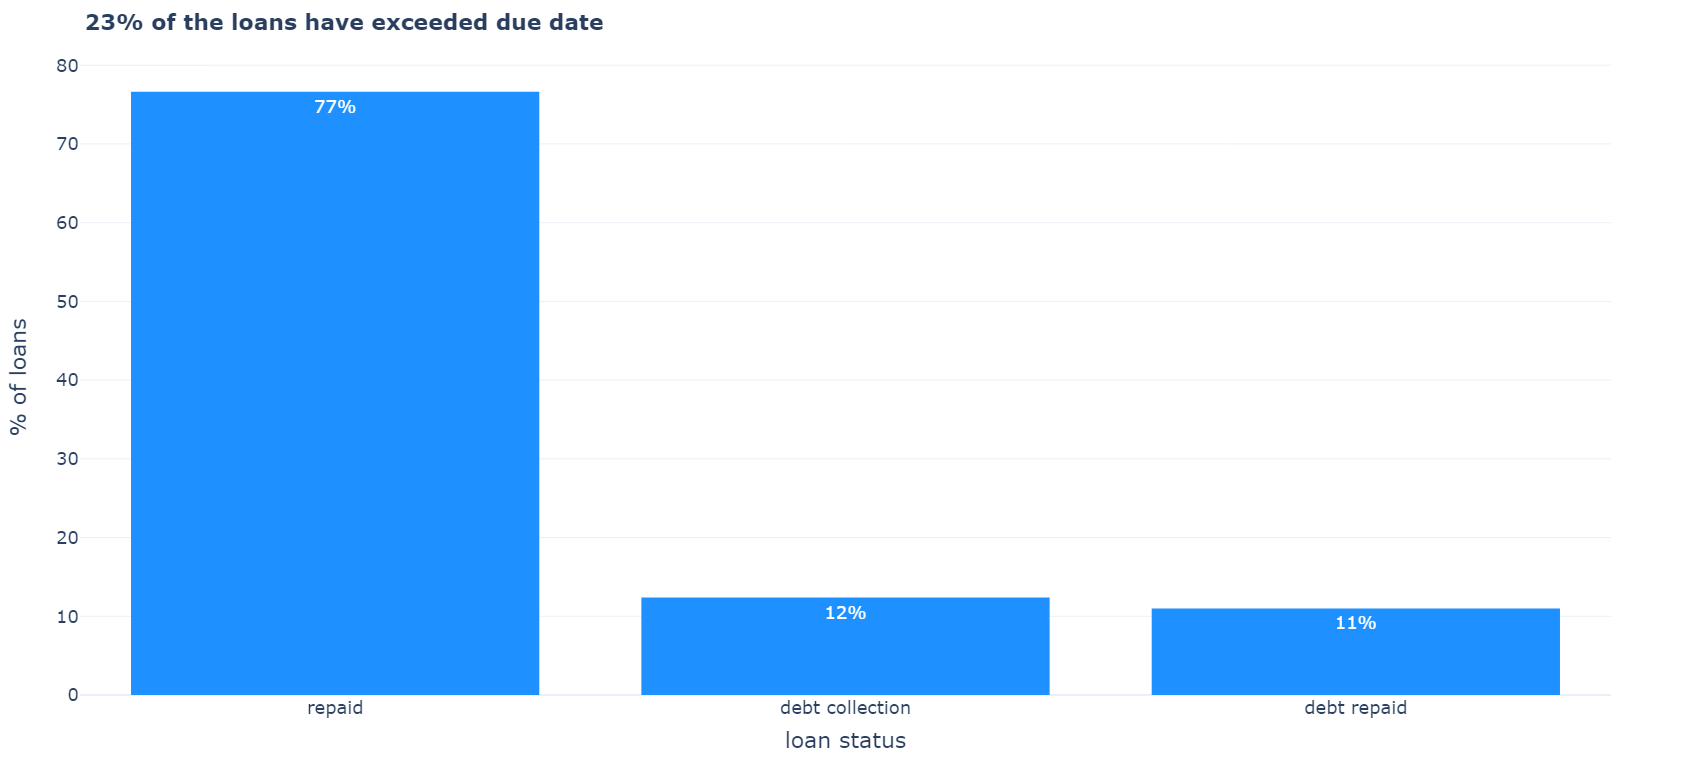

## Loan Principal Amount

**Note:** Loans typically range from more than R$6k

In [8]:
labels = []
for i in range(0, 10_000, 1_000):
    if df_loans[df_loans["amount"].between(i, i+1_000)].shape[0] > 0:
        label = f"{int(i/1_000)}k - {int((i+1_000)/1_000)}k"
        labels.append(label)
        df_loans.loc[df_loans["amount"].between(i, i+1_000), "amount_bin"] = label

In [9]:
fig = px.histogram(
    df_loans, 
    x='amount_bin', 
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Loans typically range from more than R$6k</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="principal loan amount (R$)",
    yaxis_title="% of loans",
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="outside"
)

fig.show()

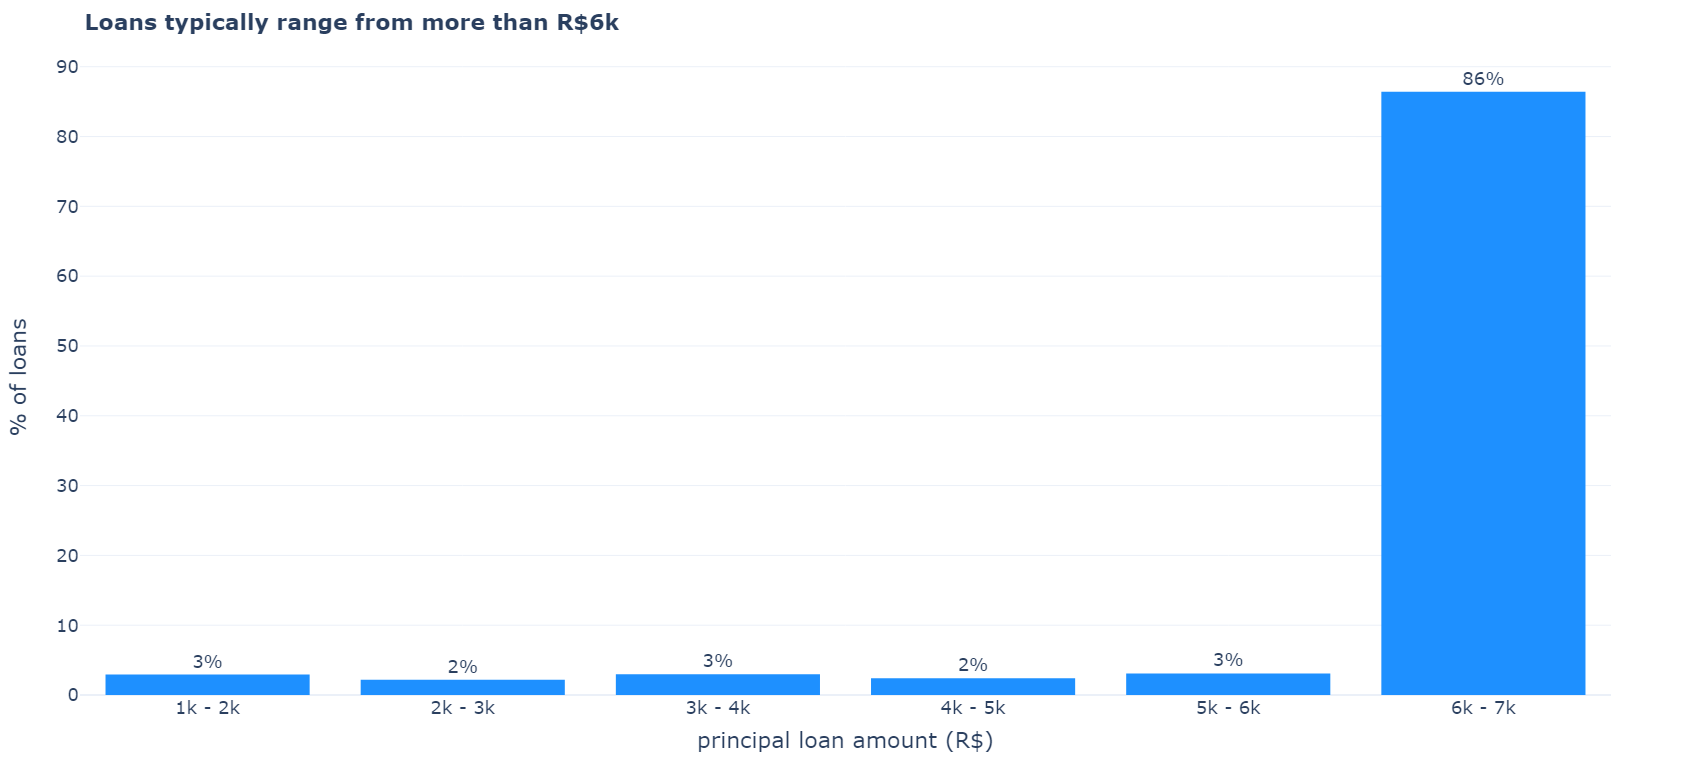

## Loan Fees

**Note:** Loan fees typically range from R$40-50

In [10]:
labels = []
for i in range(0, 60, 10):
    if df_loans[df_loans["loan_fees"].between(i, i+10)].shape[0] > 0:
        label = f"{i} - {i+10}"
        labels.append(label)
        df_loans.loc[df_loans["loan_fees"].between(i, i+10), "loan_fees_bin"] = label

In [11]:
fig = px.histogram(
    df_loans, 
    x='loan_fees_bin', 
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Loan fees typically range from R$40-50</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="loan fees (R$)",
    yaxis_title="% of loans",
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="outside"
)

fig.show()

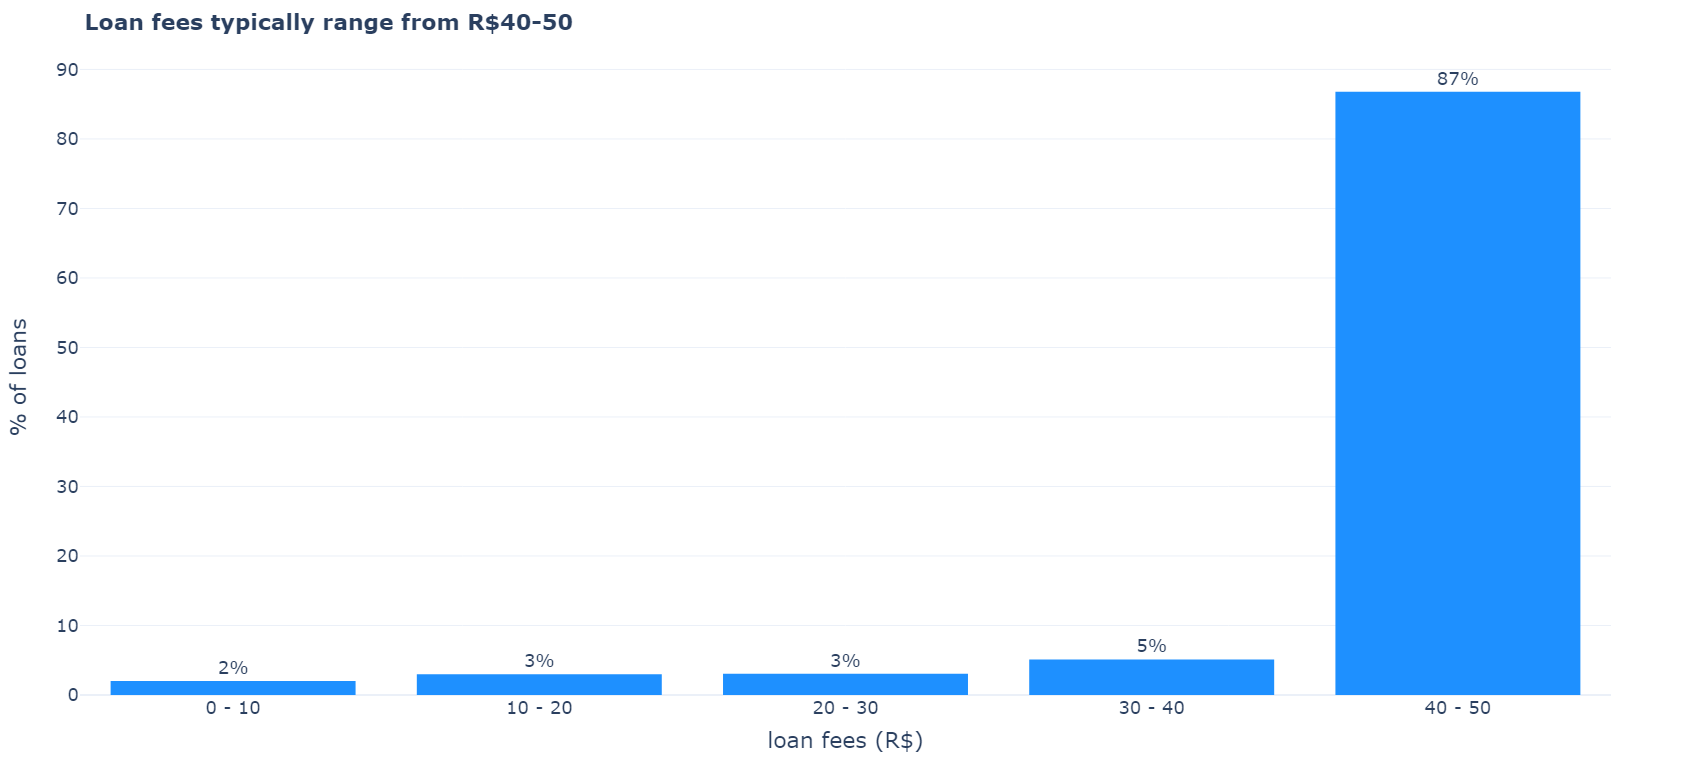

## Loan Due Amount

In [12]:
labels = []
for i in range(0, 15_000, 1_000):
    if df_loans[df_loans["due_amount"].between(i, i+1_000)].shape[0] > 0:
        label = f"{int(i/1_000)}k - {int((i+1_000)/1_000)}k"
        labels.append(label)
        df_loans.loc[df_loans["due_amount"].between(i, i+1_000), "due_amount_bin"] = label

In [13]:
fig = px.histogram(
    df_loans, 
    x='due_amount_bin', 
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Loans can range up to R$9k, if there are no repayments during the contract period</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="due loan amount (R$)",
    yaxis_title="% of loans",
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="outside"
)

fig.show()

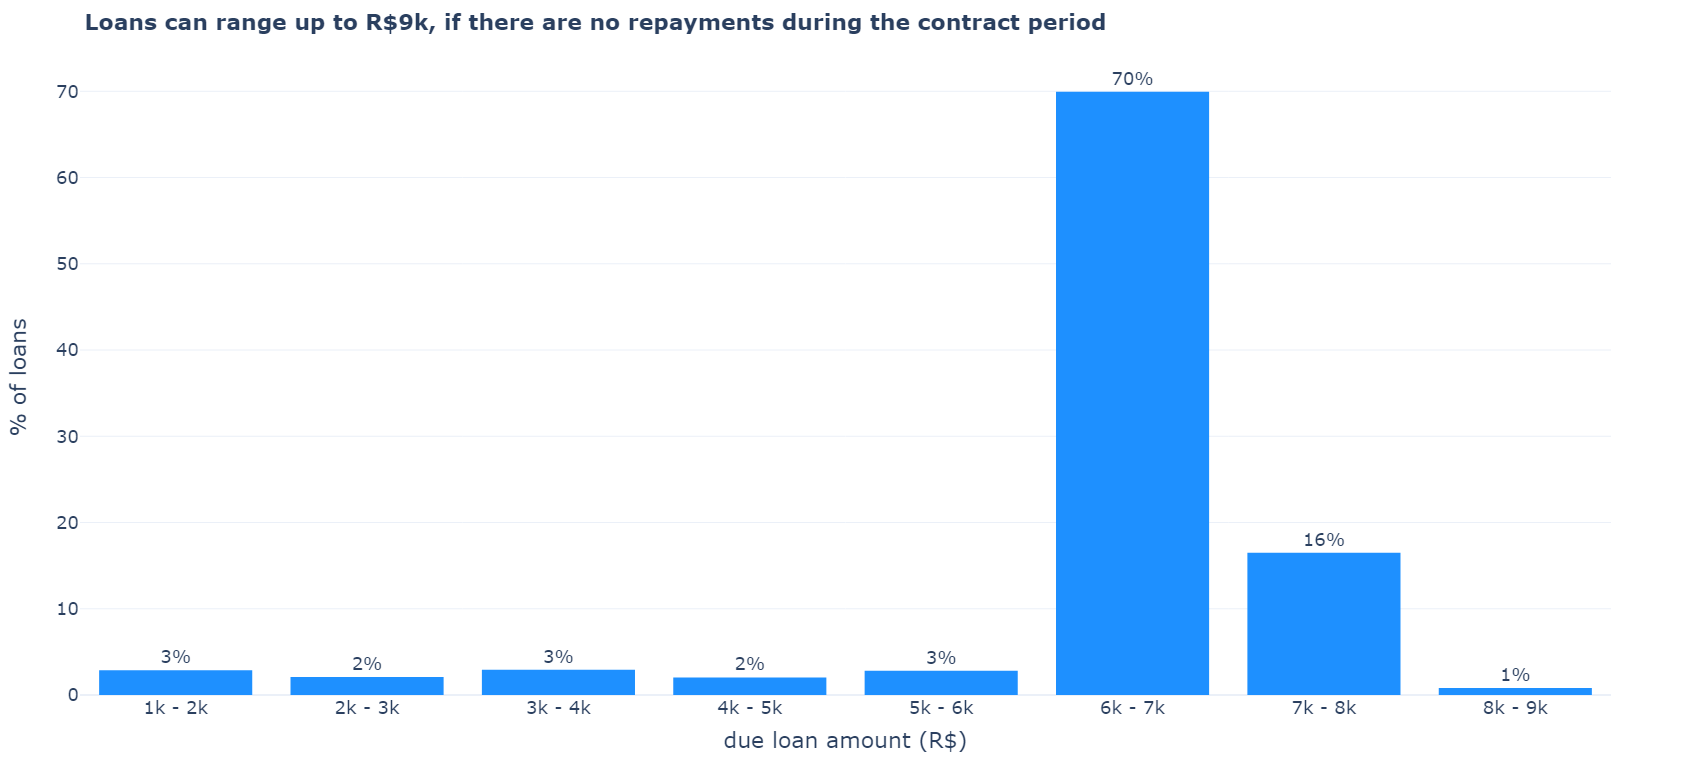

## Loan Interest Rate

**Note:** 21% of the loans have a high interest rate (above 40%)

In [14]:
labels = []
for i in range(20, 160, 10):
    if df_loans[df_loans["interest_rate"].between(i, i+10)].shape[0] > 0:
        label = f"{i} - {i+10}"
        labels.append(label)
        df_loans.loc[df_loans["interest_rate"].between(i, i+10), "interest_rate_bin"] = label

In [15]:
fig = px.histogram(
    df_loans, 
    x="interest_rate_bin", 
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]]
)

fig.update_layout(
    title='<b>21% of the loans have a high interest rate (above 40%)</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="loan interest rate (%)",
    yaxis_title="% of loans",
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{y:,.1f}%",
    textposition="outside"
)

fig.show()

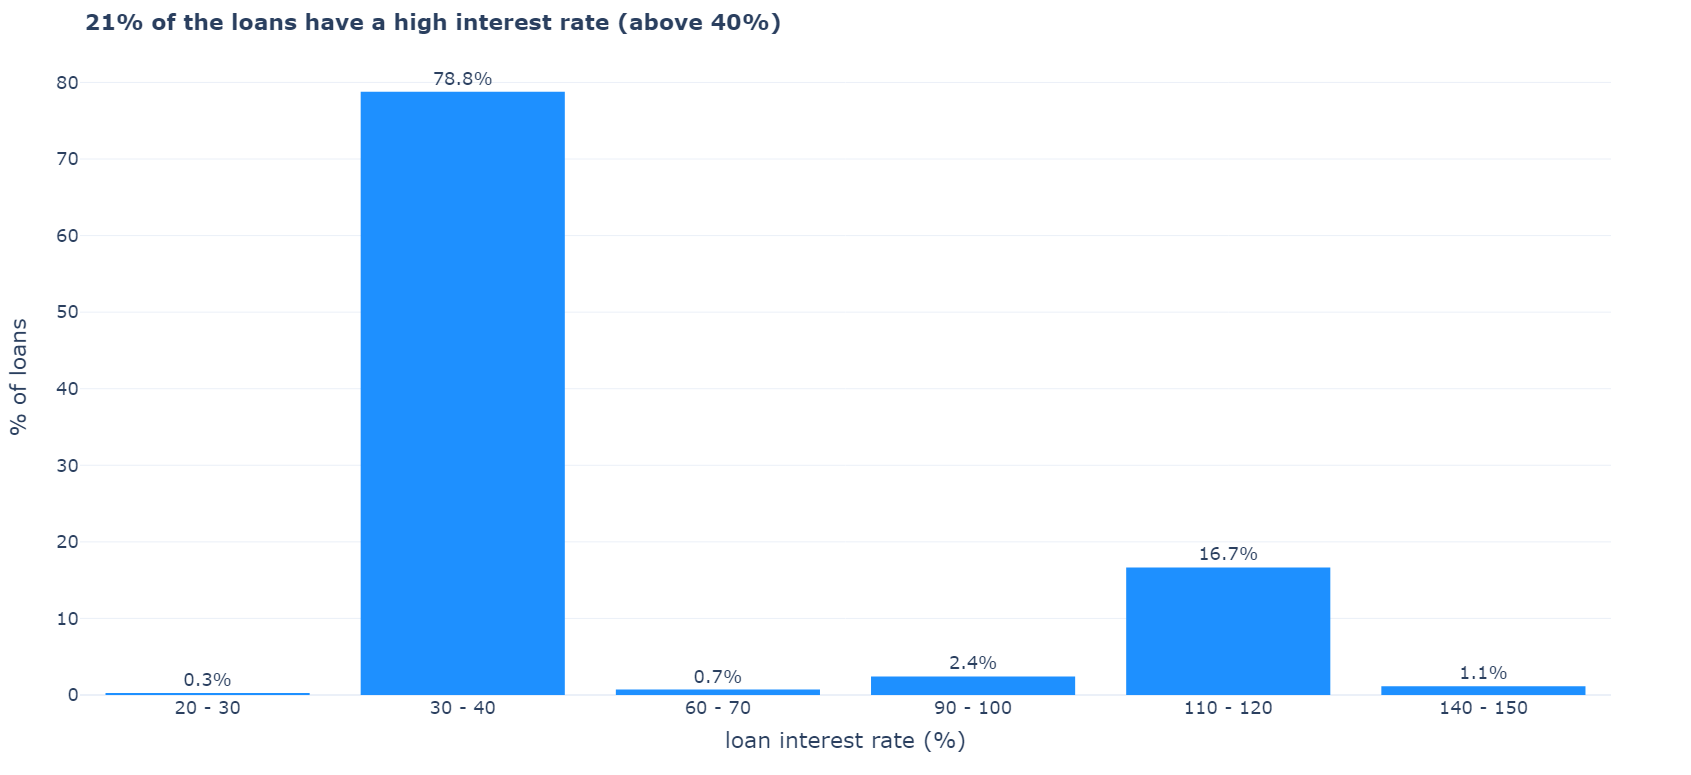

## Loan Term

**Note:** Loans typically need to be repaid in the next 3 months

In [16]:
df_loans['loan_term'].describe()

count    6595.000000
mean       90.067930
std         0.474967
min        90.000000
25%        90.000000
50%        90.000000
75%        90.000000
max       112.000000
Name: loan_term, dtype: float64

## Repayment Type

**Note:** 91% of the loan repayments are automated

In [17]:
fig = px.histogram(
    df_loan_repayments,
    x="type",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>91% of the loan repayments are automated</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="repayment type",
    yaxis_title="% of repayments",
    template=template,
)
fig.update_xaxes(
    categoryorder="total descending"
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="inside"
)

fig.show()

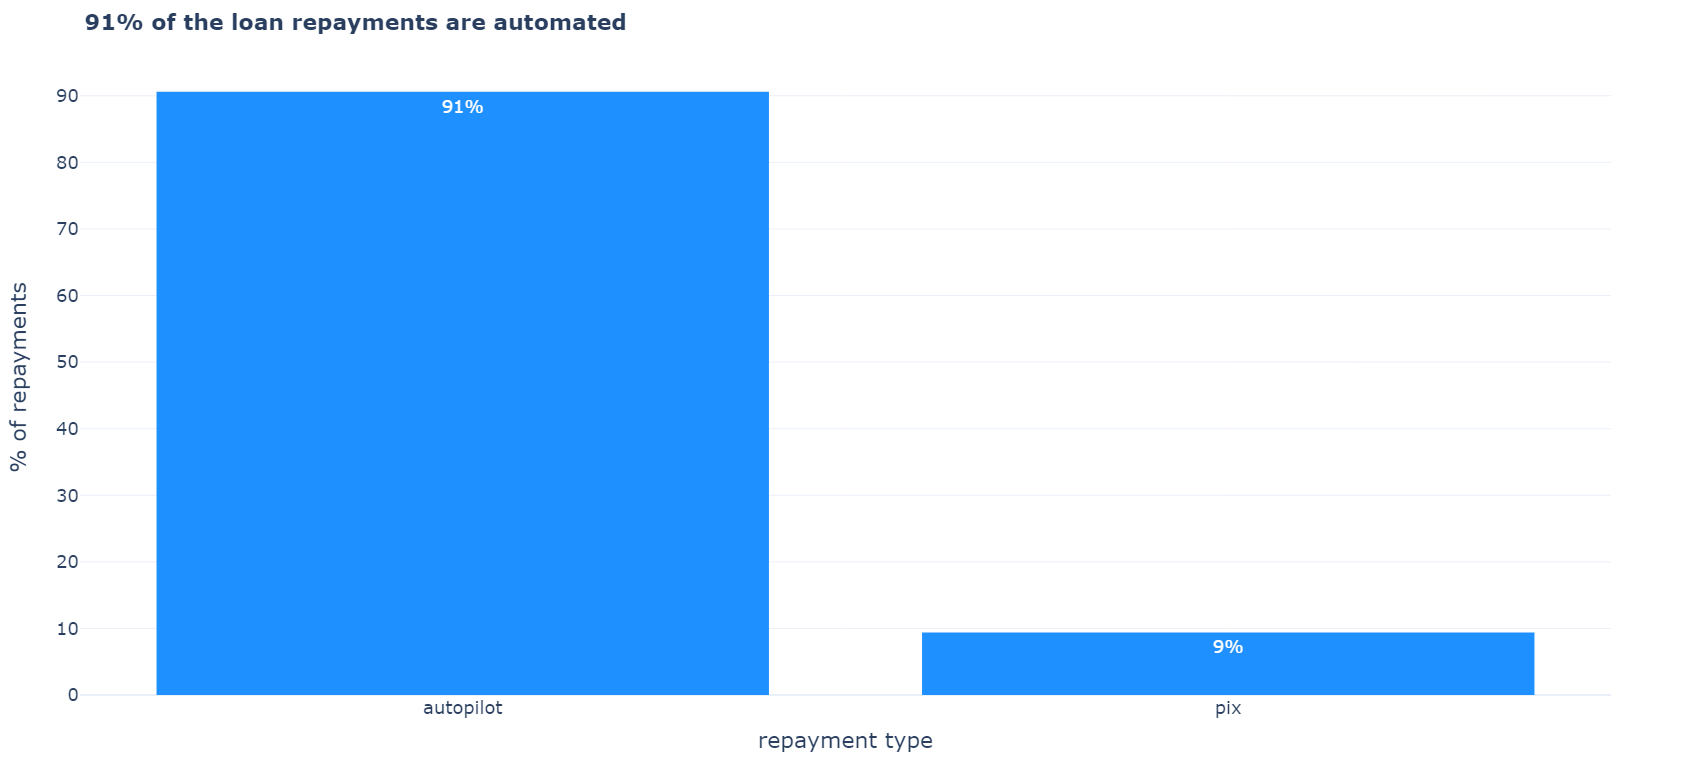

## Repayment Status

**Note:** Only 5% of the loan repayments have gone to default

In [18]:
fig = px.histogram(
    df_loan_repayments,
    x="status_cleaned",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Only 5% of the loan repayments have gone to default</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="repayment status",
    yaxis_title="% of repayments",
    template=template,
)
fig.update_xaxes(
    categoryorder="total descending"
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="inside"
)

fig.show()

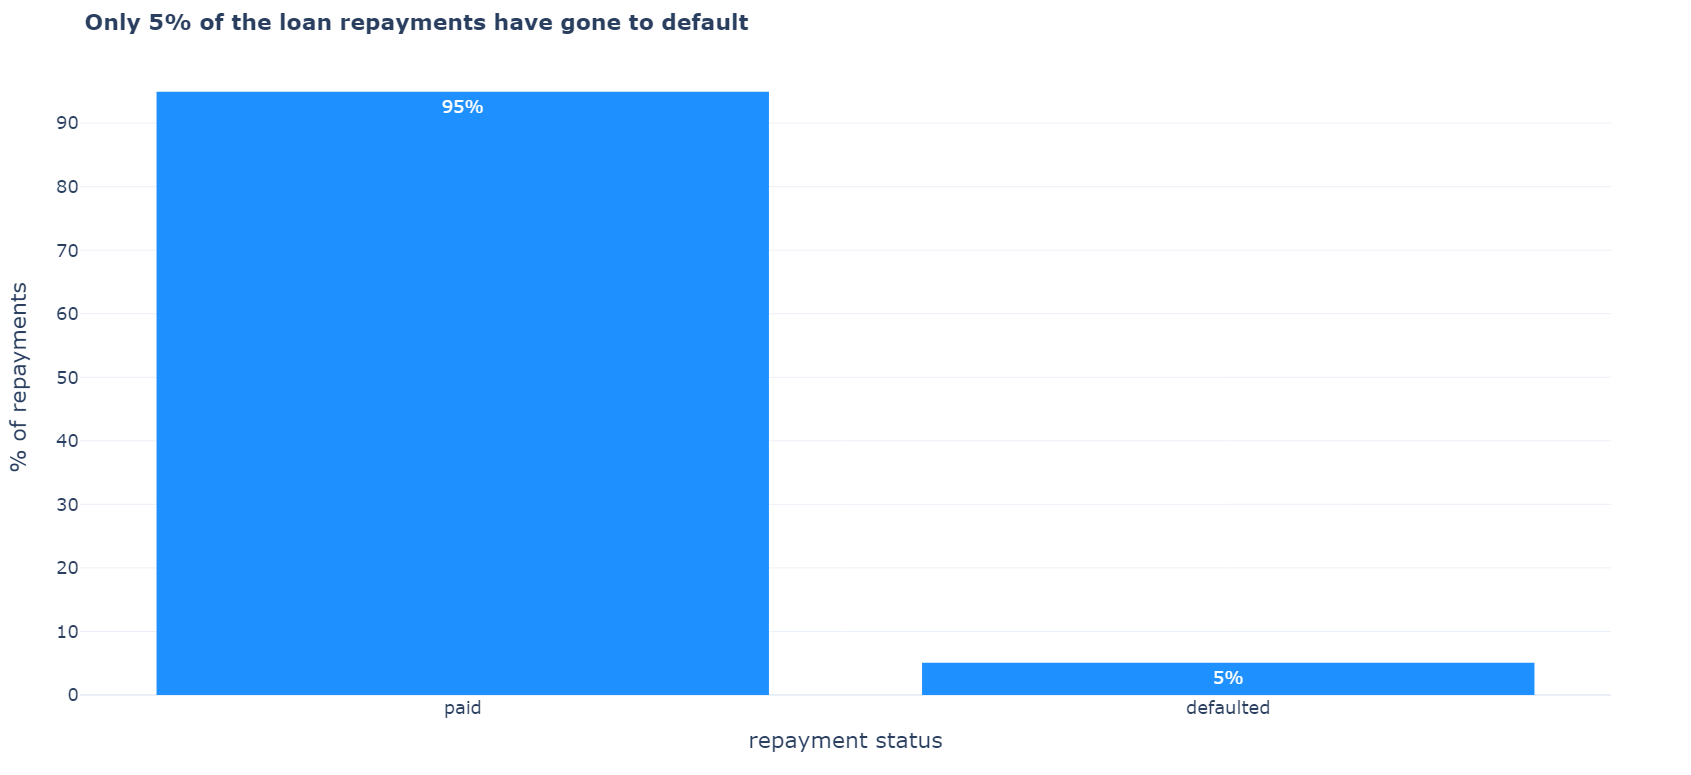

## Repayment Amount

**Note:** A typical loan repayment can range from R$27-195

In [19]:
fig = px.histogram(
    df_loan_repayments,
    x="amount",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>A typical loan repayment can range from R$27-195</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="repayment amount (R$)",
    yaxis_title="% of repayments",
    template=template,
)

fig.show()

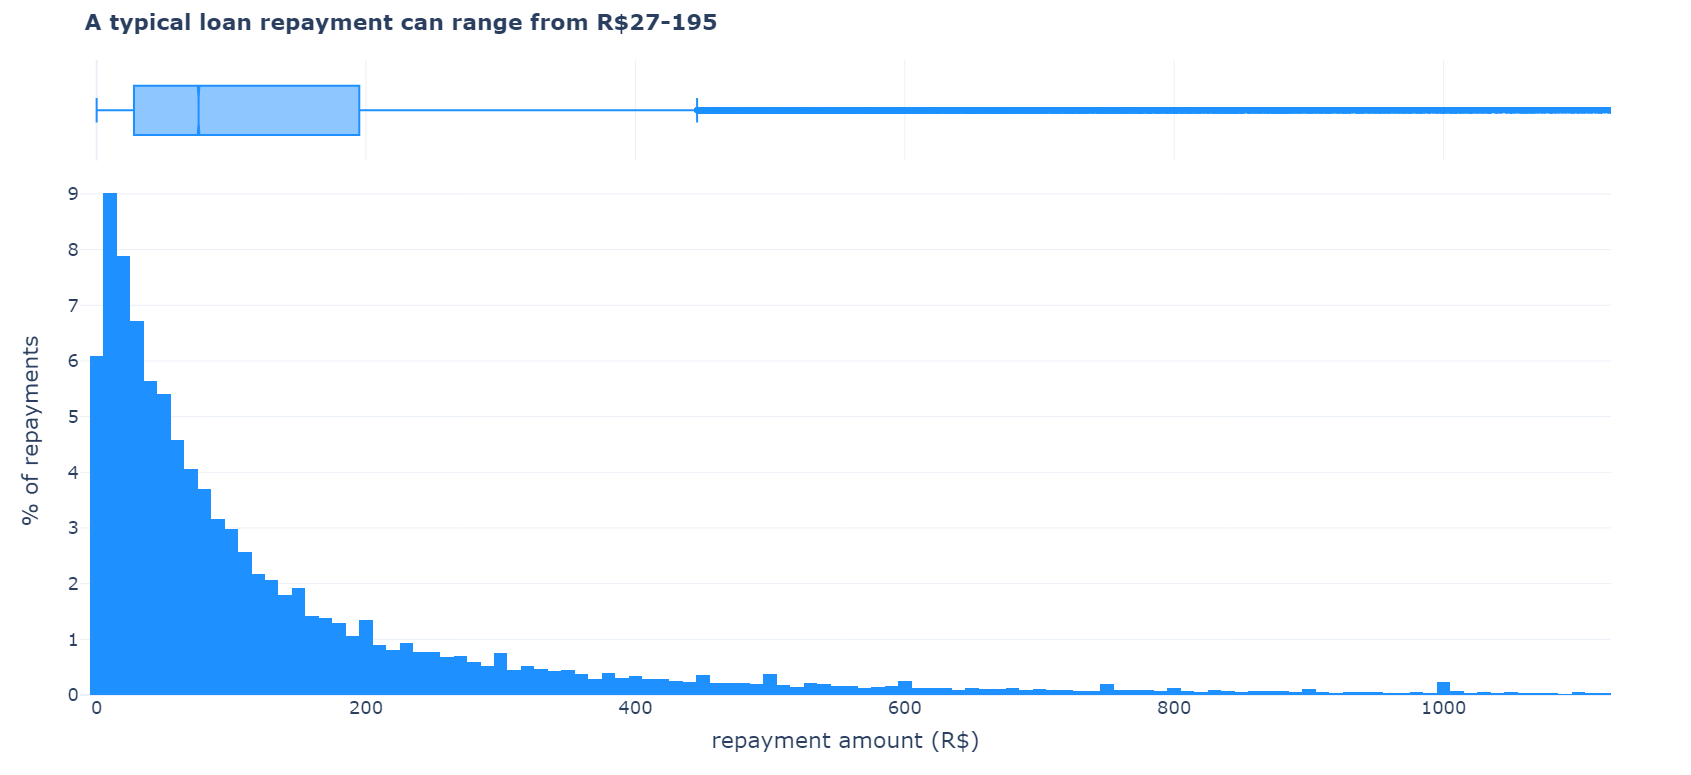

In [20]:
df_loan_repayments["amount"].describe()

count    172440.000000
mean        234.311819
std         562.375897
min           0.010000
25%          27.750000
50%          75.690000
75%         195.000000
max        7726.080000
Name: amount, dtype: float64

## Repayment Month

**Note:** Most loan repayments happen around winter time

In [21]:
labels = dict(
    sorted(
        dict(zip(df_loan_repayments["created_at_month"], df_loan_repayments["created_at_month_desc"])).items()
    )
)
labels = list(labels.values())

In [22]:
fig = px.histogram(
    df_loan_repayments,
    x="created_at_month_desc",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Most loan repayments happen around winter time</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title=None,
    yaxis_title="% of repayments",
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{y:,.1f}%",
    textposition="outside"
)

fig.show()

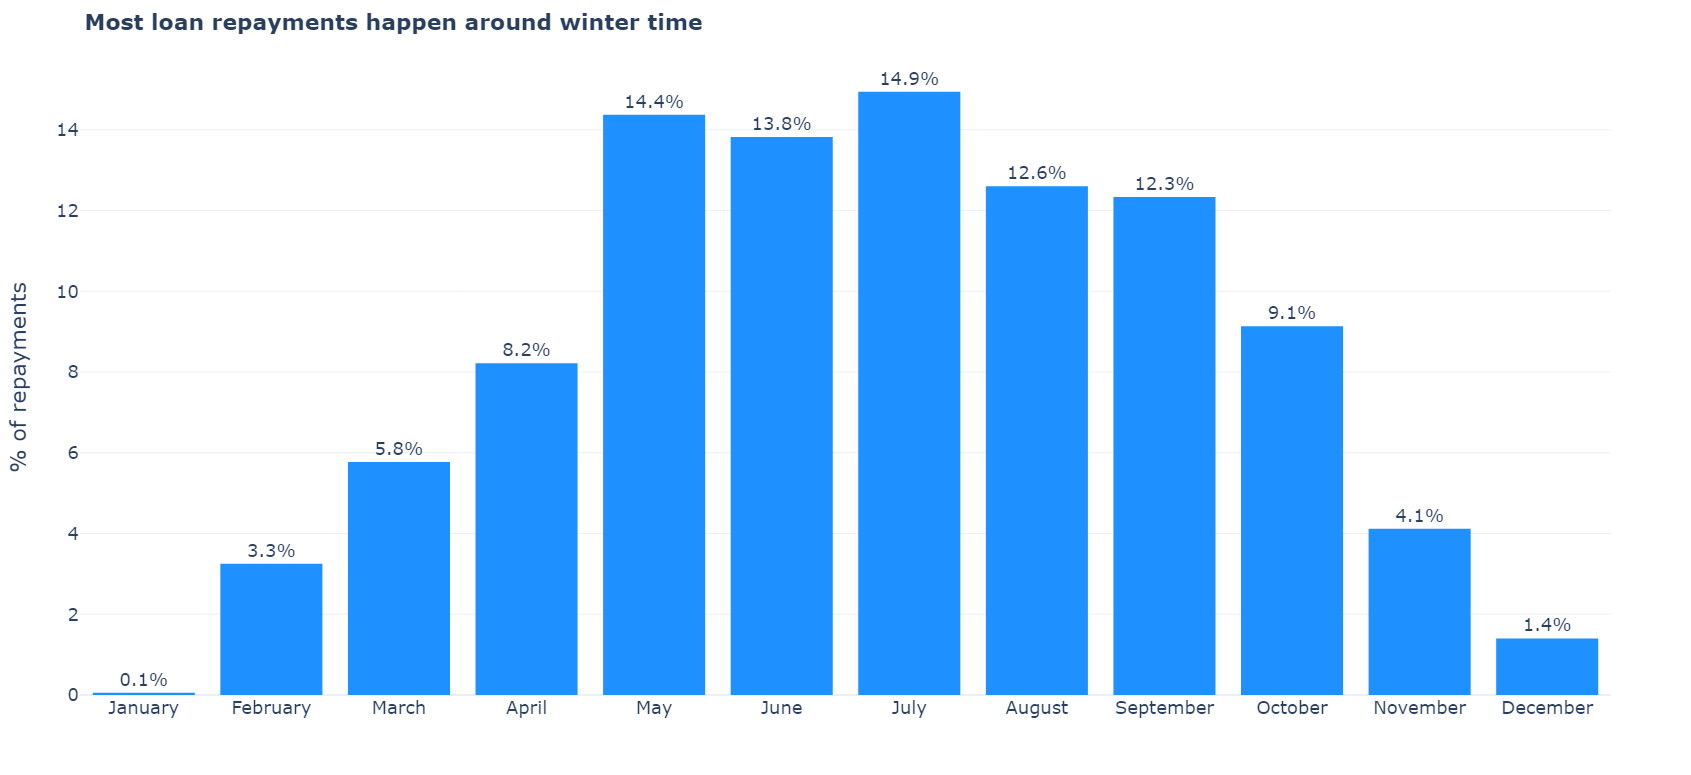

## Days Passed From Loan Creation To Repayment

**Note:** Typically, the first repayment happens at maximum in the next 3 days since the loan creation date

In [27]:
fig = px.histogram(
    df_loan_repayments,
    x="days_since_loan_created",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Days passed from loan creation to repayment distribution</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="days since loan creation",
    yaxis_title="% of repayments",
    template=template,
)

fig.show()

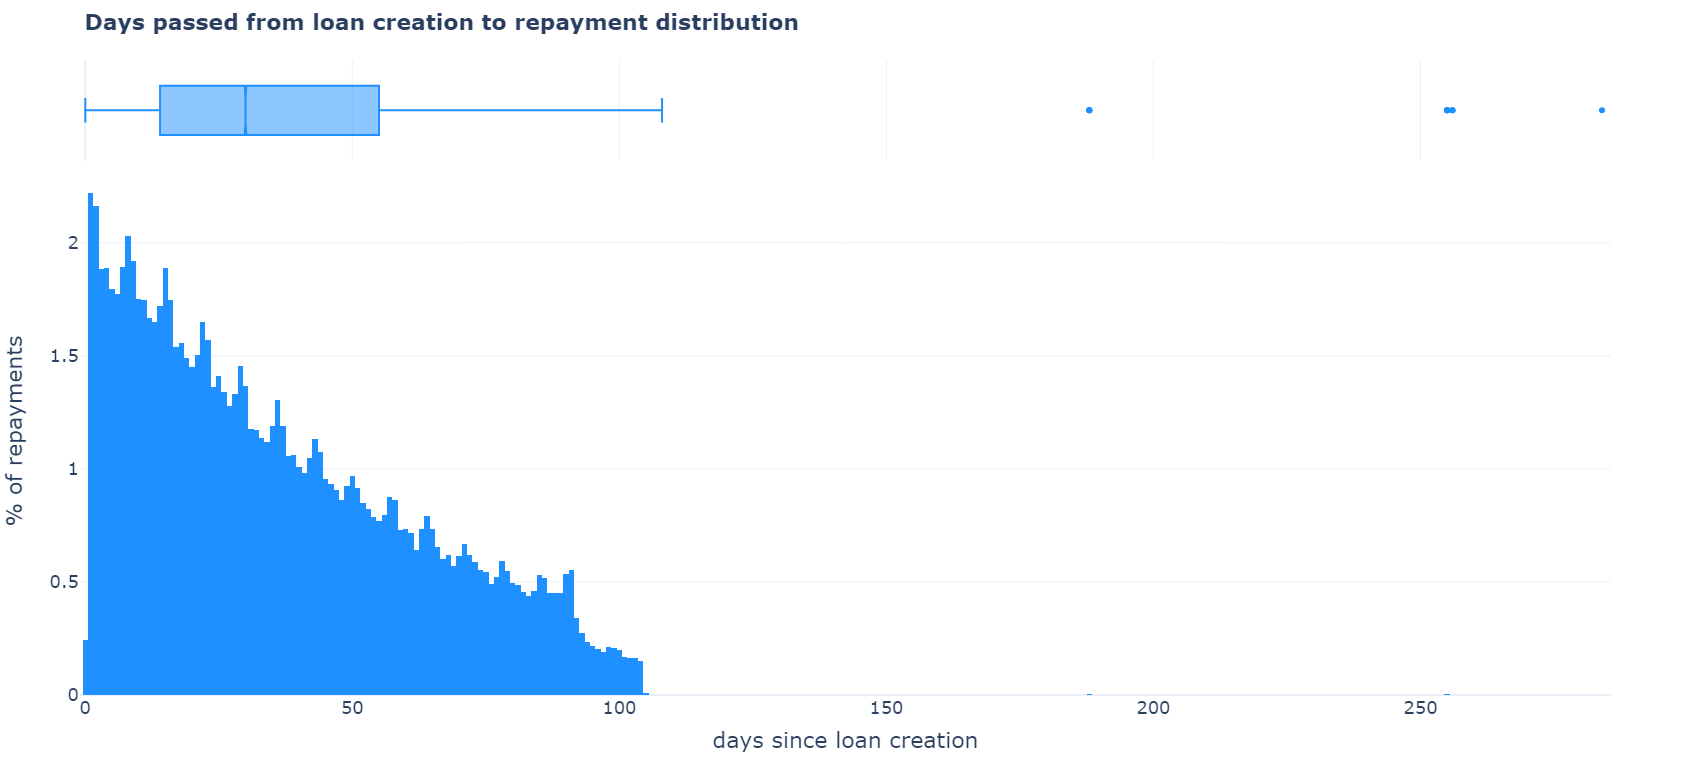

In [37]:
df_loan_repayments["days_since_loan_created"].describe()

count    172440.000000
mean         36.042177
std          26.544243
min           0.000000
25%          14.000000
50%          30.000000
75%          55.000000
max         481.000000
Name: days_since_loan_created, dtype: float64

In [36]:
# time between first repayment and loan creation date
# typically, the first repayment happens at maximum in the next 3 days since the loan creation date
df_loan_repayments \
.sort_values(by=["loan_id", "created_at"]) \
.groupby("loan_id", as_index=False) \
.first() \
["days_since_loan_created"].describe()

count    6595.000000
mean        4.006065
std         9.005422
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       104.000000
Name: days_since_loan_created, dtype: float64

## Late Repayment

**Note:** 
- Only 3% of loan repayments have exceeded the loan due date.
- Late repayments can happen between 1-10 days after the loan due date.
- On average, loans exceed due date by 3-4 repayments

In [40]:
df_loan_repayments["due_date_exceeded"] = df_loan_repayments["due_date_exceeded"].replace({0: "not exceeded", 1: "exceeded"})

In [45]:
fig = px.histogram(
    df_loan_repayments,
    x="due_date_exceeded",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Only 3% of loan repayments have exceeded the loan due date</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="due date exceeded",
    yaxis_title="% of repayments",
    template=template,
)
fig.update_xaxes(
    categoryorder="total descending"
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="outside"
)

fig.show()

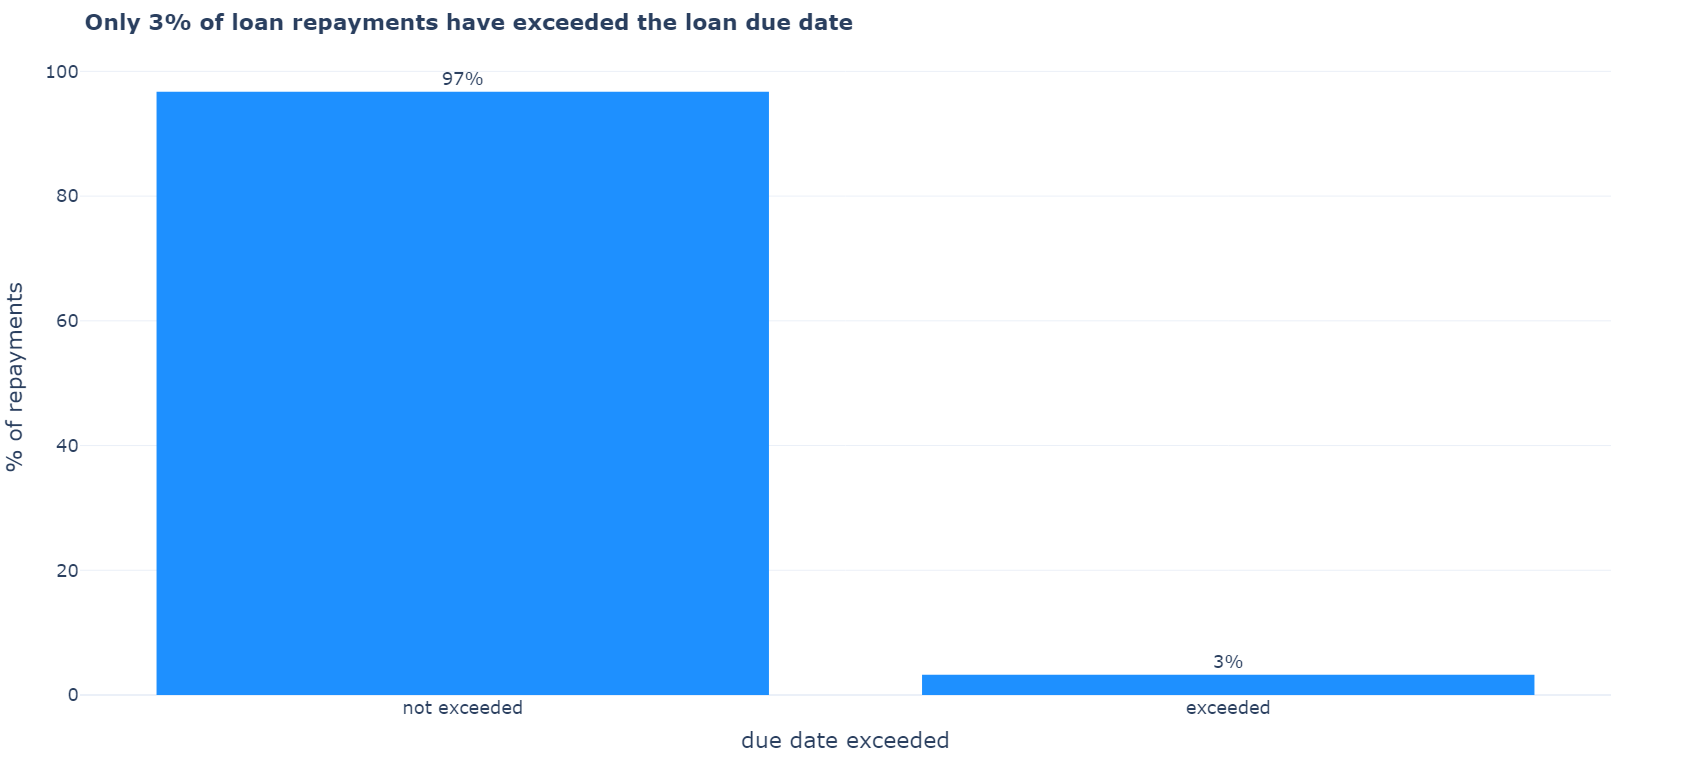

In [50]:
fig = px.histogram(
    df_loan_repayments[df_loan_repayments["days_since_due_date"] > 0],
    x="days_since_due_date",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Late repayments can happen between 1-10 days after the loan due date</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="days since due date",
    yaxis_title="% of repayments",
    template=template,
)

fig.show()

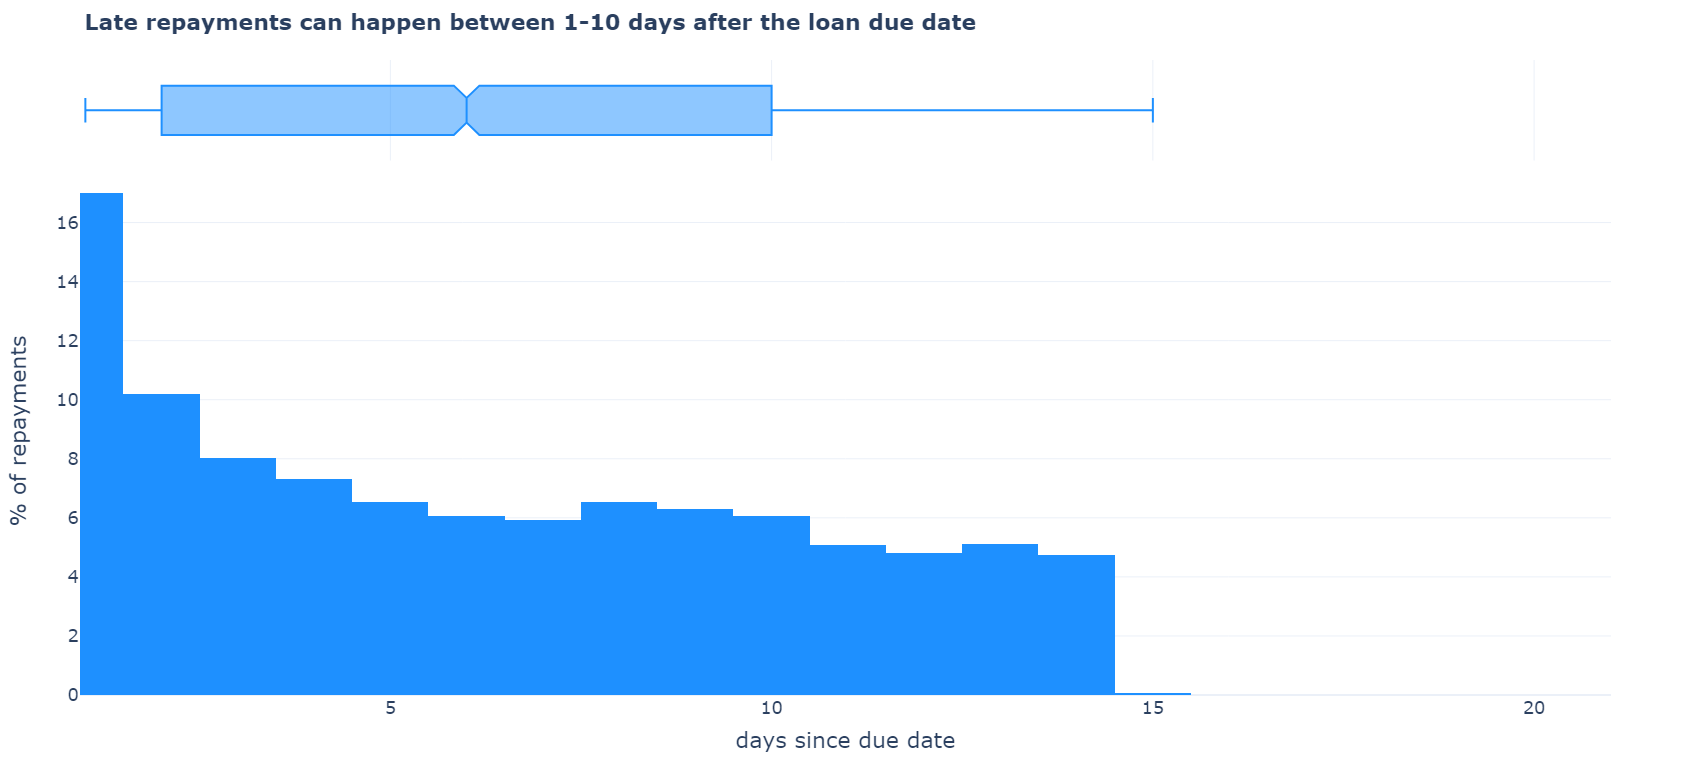

In [47]:
df_loan_repayments[df_loan_repayments["days_since_due_date"] > 0]["days_since_due_date"].describe()

count    5627.000000
mean        6.673716
std        10.546824
min         1.000000
25%         2.000000
50%         6.000000
75%        10.000000
max       391.000000
Name: days_since_due_date, dtype: float64

In [59]:
df_temp = df_loan_repayments.groupby("loan_id", as_index=False)["num_late_repayments"].max()

fig = px.histogram(
    df_temp[df_temp["num_late_repayments"] > 0],
    x="num_late_repayments",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>On average, loans exceed due date by 3-4 repayments</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="number of late repayments",
    yaxis_title="% of loan",
    template=template,
)

fig.show()

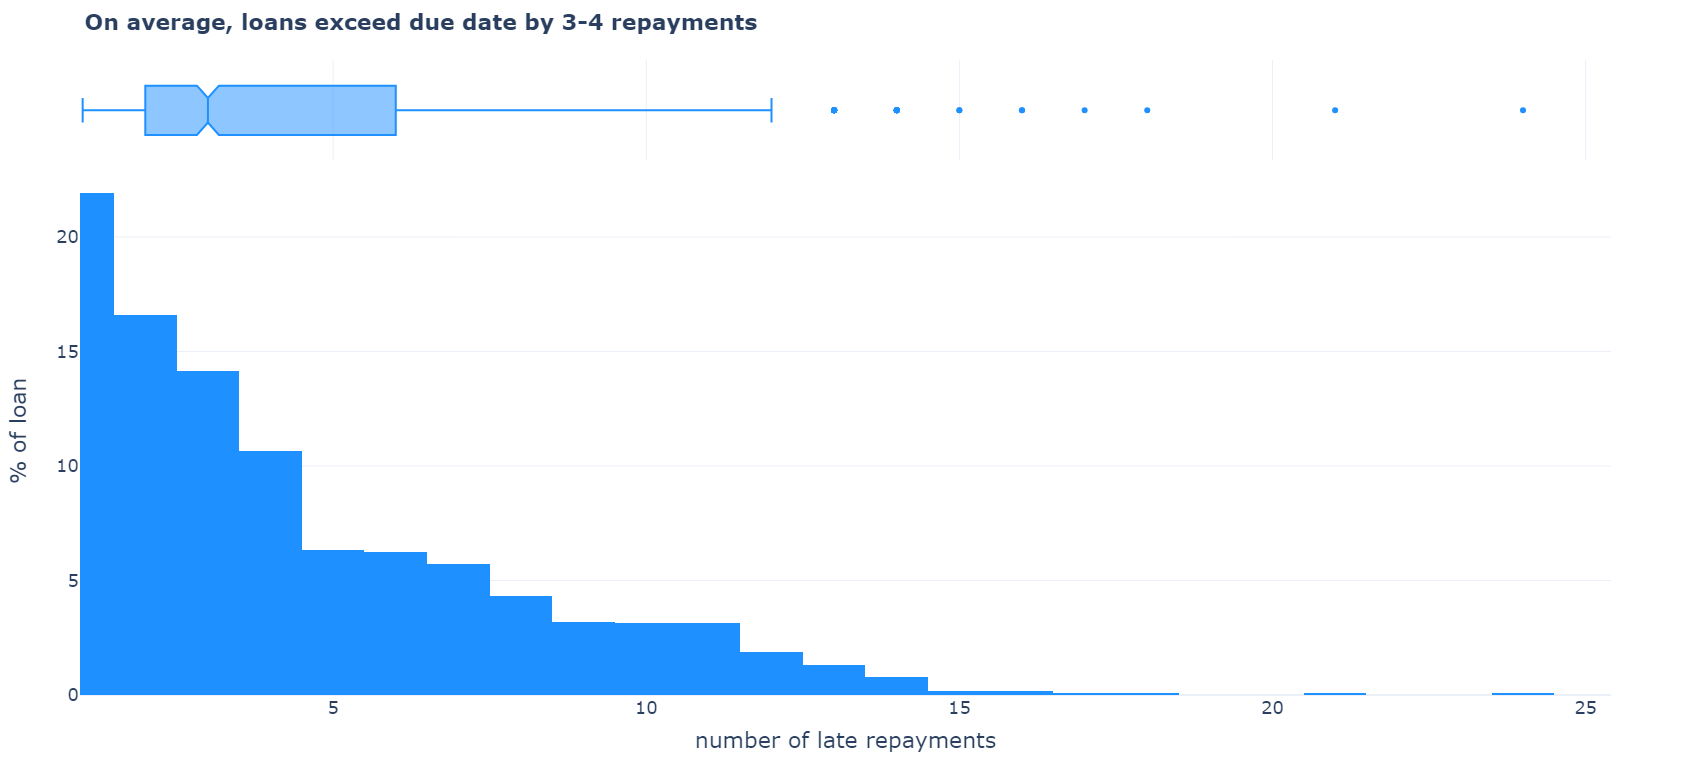

In [58]:
df_temp[df_temp["num_late_repayments"] > 0]["num_late_repayments"].describe()

count    1278.000000
mean        4.402973
std         3.450224
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        24.000000
Name: num_late_repayments, dtype: float64

## Lag Repayments

**Note:** Typically, repayments happen every 1-2 days

In [61]:
df_loan_repayments["days_lag_repayment"].describe()

count    172440.000000
mean          2.139799
std           4.217014
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         480.000000
Name: days_lag_repayment, dtype: float64

# Explanatory Analysis